In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')

from astropy.io import fits
from astropy.visualization import make_lupton_rgb
from astropy.table import Table

In [2]:
def make_plot_all(images, column_data, Q=9, stretch=40, minimum=(0,0,0)):
    for i in range(len(images)):
        if(i%8 == 0):
            plt.figure(figsize=(12,2))
            for j in range(8):
                if(i+j > len(images)-1): break
                plt.subplot(1,8,j+1)
                title = '{:.2f}'.format(column_data.iloc[i+j])
                plt.title(title)
                rgb = make_lupton_rgb(images[i+j][2], images[i+j][1], images[i+j][0], 
                                    Q=Q, stretch=stretch, minimum=minimum)
                plt.imshow(rgb, aspect='equal')
                plt.xticks([], [])
                plt.yticks([], []) 
            plt.show() 
    plt.close()        

## Candidates from my DES search

In [3]:
#My candidates 
hdu_list = fits.open('mycand.fits')
images = hdu_list[1].data.astype(np.float32)
data_fits = Table(hdu_list[2].data).to_pandas() #Data is not complete here, just in the right sort
hdu_list.close()

data = pd.read_csv('mycand_complete.csv') # csv file with complete data
data = data.set_index('COADD_OBJECT_ID').loc[data_fits['COADD_OBJECT_ID']].reset_index() #Sorting actual data

data.head()

,COADD_OBJECT_ID,TILENAME,RA,DEC,EXP_SCORE,FLUX_RADIUS_G,FLUX_RADIUS_R,FLUX_RADIUS_I,KRON_RADIUS,MAG_AUTO_G,MAG_AUTO_R,MAG_AUTO_I,MOF_BDF_G_1,MOF_BDF_G_2,MOF_BDF_T,EXT_COADD,MAG_APER_4_G,MAG_APER_4_R,MAG_APER_4_I
0,1034580329,DES0001-0541,0.060795,-5.950927,0.596826,23.912516,17.423922,14.134644,3.963079,19.829361,19.163866,18.677170,0.242343,-0.124535,289.806547,3,23.099527,21.792303,20.914354
1,1037197500,DES0003-3832,1.117293,-38.735859,0.963632,8.221107,7.733007,7.299081,3.763845,21.132111,19.434940,18.708550,-0.083615,0.170265,32.353910,3,22.959064,21.075144,20.217318
2,1038387666,DES0004-3540,0.996528,-35.702913,0.551382,9.116244,5.748978,4.303670,3.515021,22.437197,21.130924,20.200390,0.284425,0.056305,3.703559,3,24.545330,22.376423,21.121323
3,1034878415,DES0000-5622,359.693046,-56.647212,1.362879,7.177113,6.732160,6.230381,3.689739,21.041395,20.202885,19.570616,0.071694,-0.036024,5.606902,3,23.256767,22.021646,21.100098
4,1035218293,DES0002-4206,0.416360,-42.040657,0.975693,3.867501,3.248713,3.215196,3.500000,23.231394,21.541759,20.868656,0.192094,0.037473,1.344430,3,24.025890,22.139589,21.458899


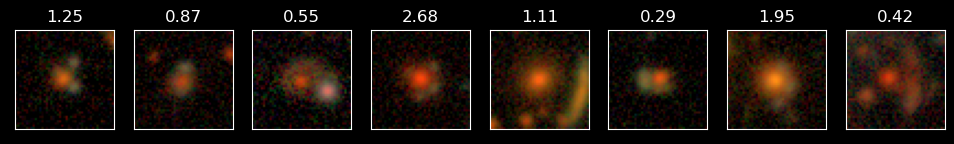

In [4]:
data_tmp = data.sample(8)
images_tmp = images[data_tmp.index]
make_plot_all(images_tmp, data_tmp['EXP_SCORE'])

## Candidates visually inspected in my second paper (reported in SLED + processed by the 3 ML DES search models)

In [5]:
#SLED candidates
hdu_list = fits.open('sledcand.fits')
images = hdu_list[1].data.astype(np.float32)
data_fits = Table(hdu_list[2].data).to_pandas() #Data is not complete here, just in the right sort
hdu_list.close()

data = pd.read_csv('sledcand_complete.csv') # csv file with complete data
data = data.set_index('COADD_OBJECT_ID').loc[data_fits['COADD_OBJECT_ID']].reset_index() #Sorting actual data

data.head()

,COADD_OBJECT_ID,EXP_SCORE,TILENAME,RA,DEC,FLUX_RADIUS_G,FLUX_RADIUS_R,FLUX_RADIUS_I,KRON_RADIUS,MAG_AUTO_G,MAG_AUTO_R,MAG_AUTO_I,MOF_BDF_G_1,MOF_BDF_G_2,MOF_BDF_T,EXT_COADD,MAG_APER_4_G,MAG_APER_4_R,MAG_APER_4_I
0,1037154929,0.0,DES0003-3832,0.719974,-38.286215,6.742981,6.098176,5.795175,3.500000,20.270494,18.801615,18.315552,-0.109304,-0.064847,6.185082,3,21.772249,20.112469,19.510805
1,1037197500,0.5,DES0003-3832,1.117293,-38.735859,8.221107,7.733007,7.299081,3.763845,21.132111,19.434940,18.708550,-0.083615,0.170265,32.353910,3,22.959064,21.075144,20.217318
2,1034166850,0.0,DES0000-0416,0.402182,-4.011145,5.909236,5.724055,5.439665,3.500000,21.642208,20.616764,19.760178,0.064035,-0.014595,3.880700,3,23.285002,22.118181,21.125927
3,1032630238,2.5,DES0002-3332,0.818284,-33.801233,9.348762,6.749952,5.750351,3.842526,21.382627,20.133585,19.212091,-0.212017,0.094016,10.020631,3,23.468189,21.513172,20.409477
4,1035092110,0.8,DES0002-5957,0.931545,-59.897416,6.607525,6.221747,6.062074,3.500000,20.348505,18.995399,18.503607,0.165366,-0.025615,10.672958,3,21.871614,20.322598,19.782965


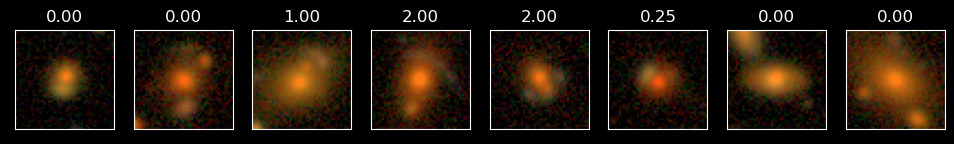

In [6]:
data_tmp = data.sample(8)
images_tmp = images[data_tmp.index]
make_plot_all(images_tmp, data_tmp['EXP_SCORE'])